In [1]:
# Imports the print function from newer versions of python
from __future__ import print_function

# Setup

# The Random module implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# The Time library helps us time code runtimes
import time

# The skimage is used for the image processing tasks
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the

import cv2
import math
# notebook rather than in a new window.
%matplotlib inline

## Image processing 

The target of this excerise is to use different filters or operators to do image processing.

Your task will be:

* Apply Kernels and Use Box Filters and Gaussian Methods on Images:

    - Kernels are small matrices used for various image processing operations.
    - Box filters and Gaussian filters are commonly used for blurring or smoothing images.


* Detect Edges of the Image by Sobel Filter:

    - The Sobel filter is a popular method for edge detection in images.
    - It works by calculating the gradient of the image intensity at each pixel.
    
* Apply Fast Fourier Transform (FFT) on Image and Remove the Low-Frequency Component:

    - FFT is used to transform an image from the spatial domain to the frequency domain.
    - Low-frequency components in an image correspond to smooth areas.
    - Removing these low-frequency components can enhance edges and details in the image.
  
  
  
 If see your <span style="color:red">#### YOUR CODE ####</span>  headline, it is the part you need to implement

### Task 1. Box Filters and Gaussian filter on images

You need to finish this tasks by following steps:
* Load 'image_01' under this folder and display it 
* Apply 3*3 kernel and using box filter, display the filtered image and compare to the original image
* Apply 3*3 kernel and using Gaussian filter, display the filtered image and compare to the original image, did you see any difference between filtered image by box filter and Gaussian method respectively?
* Change the size of the kernel to 5*5 by Gaussian and box filters respectively, display the filtered images
* Compare to the above images, and see the differences and explain why

In this case, you can use pacakge openCV to implement the above task.

In [8]:
image1_path = './image_01.png'


def load(image_path):
    """
    Load image1.jpg by using the function matplotlib.pyplot 
    """
    #Implement your code here and return a Numpy data type
    img = plt.imread(image_path)
    return img

img = load(image1_path)

In [9]:

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
   

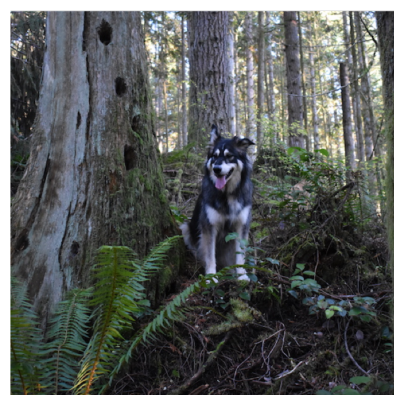

In [10]:
display(img)

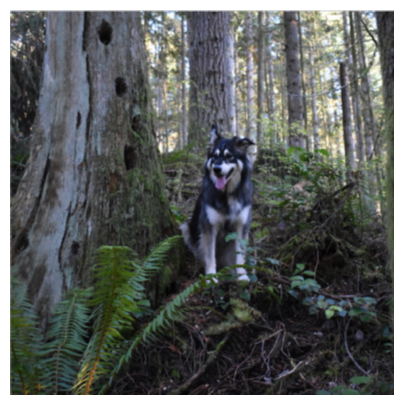

In [14]:
# Apply a box filter and displayed the filtered image
#### YOUR CODE ####
box_filtered = cv2.boxFilter(img, -1, (3, 3))
#### YOUR CODE ####
display(box_filtered)

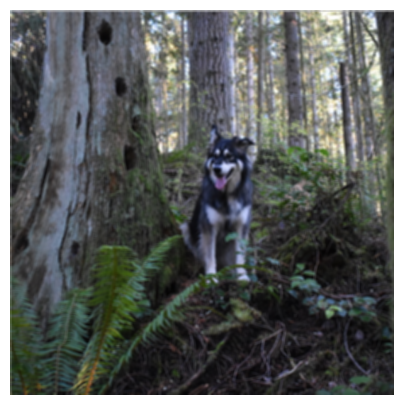

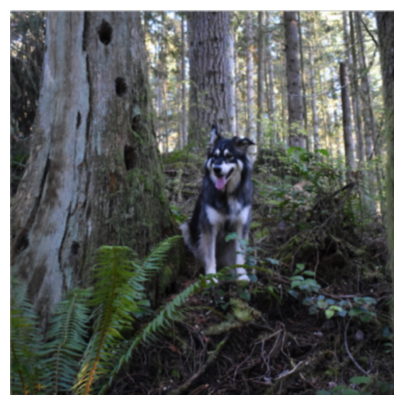

In [15]:
# Apply a Gaussian filter and display the filtered image
#### YOUR CODE ####
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)
#### YOUR CODE ####
display(gaussian_filtered)
#### YOUR CODE ####

### Task 2:  Sober filter to detect edge of image

In this tasks, we will create a tool to detect the edge of an image from scratch (instead of using package in sake of better understanding the algorithm ). We will implement the solber filter in this case. 

   * The Sobel filter is commonly used for edge detection in images.
   * It computes the gradient of the image intensity at each pixel.
   
There are three steps:
   * Define the matrics associate the sober kernel
   * Calculate x and Y gradients
   * Sweep the entire image by sober filter and generate the filtered image

Now, let's start!

#### 1. The matrices associated with the kernels we'll be using are given by (two directions):

In [16]:
# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

In [17]:
Gx

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [18]:
Gy 

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]])

#### 2. Generate X and Y gradients:

How does it work? The process is using the Sobel filters (above) which is a discrete approximation of the derivative, we will perform a convolution operation on the image. So as a result, we will get two X and Y Gradients, the gradients are vectors that points in the direction of the greatest rate of change in the image intensity.

 ![Object](./sober_filter_calculation.png)



So, for example, if we are given the following 3*3 patch of grayscale image:

 ![Object](./grayscale_patch.png)



$$
\left(\begin{array}{cc} 
119 & 80 & 122\\
177 & 154 & 212 \\
89 & 25 & 152
\end{array}\right)
$$ 

Then the output from the operations is:

$$
\begin{array}{c}
(G_x(A))=1\cdot119+0\cdot80-1\cdot122+2\cdot177+0\cdot154-2\cdot212+1\cdot89+0\cdot25-1\cdot152 \newline\newline
\therefore\quad G_x(A)=-136 \newline\newline
\quad\text{and}\quad\newline\newline
(G_y(A))=1\cdot119+2\cdot80+1\cdot122+0\cdot177+0\cdot154+0\cdot212-1\cdot89-2\cdot25-1\cdot152 \newline\newline
\therefore\quad G_y(A)=110
\end{array}
$$

To apply the Sobel operation to that patch of image we want to calculate:

$$
\sqrt{[G_x(A)]^2+[G_y(A)]^2}
$$



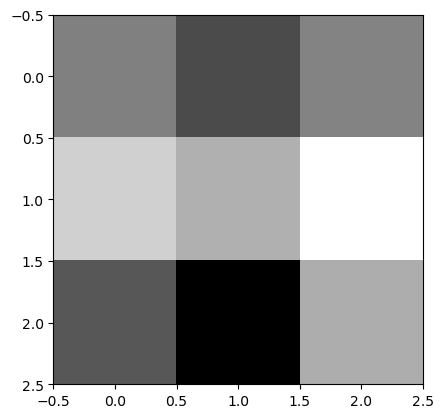

In [19]:
##Implemnt Gx(A) and Gy(A) calculation on patch A
A = np.array([[119,80,122],[177,154,212],[89,25,152]])
plt.imshow(A,cmap="gray")

In [20]:
#### YOUR CODE ####
#calculate the output of the kernel after sober filter operation, hint: using numpy package
GxA = np.sum(np.multiply(Gx,A))
GyA = np.sum(np.multiply(Gy,A))
output_value = np.sqrt(GxA**2+ GyA**2) 
#### YOUR CODE ####

Your output_value should be equlat to 174.91712323268982

#### 3. Detect edge of the entire image

Now, let's apply the sober filter on the entire image as followed and detect the edge
 ![Object](./image_02.png)
 
 

In [25]:
# First， we need to know the shape of the above image 
image2_path = './image_02.png'
img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
#Obtain the shape of the image
rows,colums = np.shape(img2)[0], np.shape(img2)[1]

In [27]:
img2.shape

(389, 322)

In [28]:
#Put a place holder for filtered image (initiliase the filterd image by giving value zero)
sobel_filtered_image = np.zeros(shape=(rows,colums))

Now we need to loop ("sweep") image in both x and y direction and comput the outoput for each patch as we did in the step 2.

In [29]:
for i in range(rows-2):
    for j in range (colums-2):
        #### YOUR CODE ####
        gx = np.sum(np.multiply(Gx, img2[i:i+3, j:j+3])) #x_direction
        gy = np.sum(np.multiply(Gy, img2[i:i+3, j:j+3])) #x_direction
        sobel_filtered_image[i+1,j+1] = np.sqrt(gx**2 + gy**2) #calculate the sum of both direction
        #### YOUR CODE ####

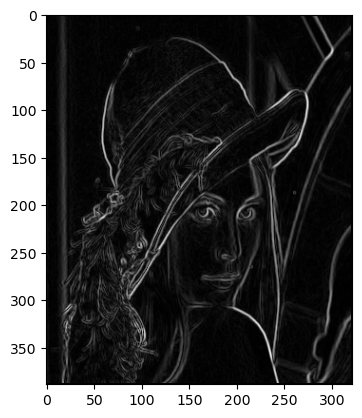

In [30]:
#### YOUR CODE ####
#Show the image in gray color
plt.imshow(sobel_filtered_image,cmap="gray")
#### YOUR CODE ####

### Task 3: Fast Fourier Transform (FFT)

The last task is to implement FFT and apply high pass filter to remove the high frequency signal by using low-pass filter, or remove the low frequency signal by using high-pass filter.

FFS is an mathematical technique utilized to transform images from their spatial domain to their frequency domain, is a pivotal tool for frequency transformation in image processing. By leveraging the frequency domain representation of an image, we can effectively analyze the image based on its frequency content, thus simplifying the application of filtering procedures to eliminate noise. 

In this case, you can use the "openCV" liabray for the task.

Now let's start.


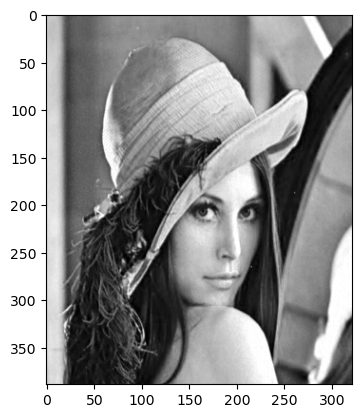

In [190]:
# We use the image (img2) in the above task 
#Show the image in gray color
plt.imshow(img2,cmap="gray")

#### Step 1: Fast Fourier Transform (FFT )


Employing FFT analysis, the periodicity of the image is meticulously analyzed and divided into distinct frequency components. Consequently, an image frequency spectrum is generated, exhibiting the amplitude and phase of each of the image’s respective frequency components.

Thus, the first step is to convert the image from spatial domain to frequency domain

In [31]:
#### YOUR CODE ####
# FFT 
f = np.fft.fft2(img2)  # compute the image2 to its 2D Discrete Fourier transform  #hint: using numpy package 
#### YOUR CODE ####


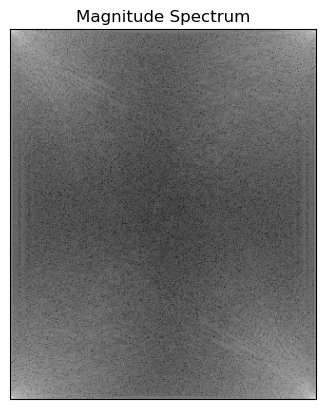

In [32]:
mag = 20*np.log(np.abs(f)) #Transform to log magnitude to easily visualize 
plt.imshow(mag, cmap = 'gray') #cmap='gray' parameter to indicate that the image should be displayed in grayscale.
plt.title('Magnitude Spectrum') 
plt.xticks([]), plt.yticks([])
plt.show()

The magnitude of the Fourier transform f is computed using np.abs(), converted to a logarithmic scale using np.log() and multiplied by 20 to get the magnitude in decibels. This is done to make the magnitude spectrum easier to visualize and interpret. 

You can see the zero-frequency component (the light color ) of the image is located on the four corners of the above image.

#### Step 2: FFS shift  

Subsequently, to enable the application of filtering algorithms to the image, the zero-frequency component of the image is shifted to the center of the frequency spectrum utilizing an FFT shift.


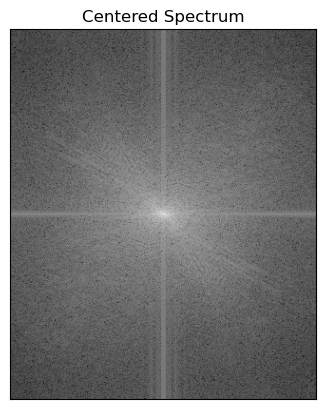

In [33]:
###YOUR CODE ##
fshift = np.fft.fftshift(f)
###YOUR CODE ##

mag = 20*np.log(np.abs(fshift)) 
plt.imshow(mag, cmap = 'gray')
plt.title('Centered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#### Step3: Define low pass or high pass  filters -  to remove high frequency noise or sharp the image

low pass filter:  

high pass filter: 

The initial stage of frequency transformation involves the use of various filtering algorithms to reduce noise and enhance image quality. One of the most commonly employed filters for image sharpening are the Gaussian high-pass filter. These filters are applied to the frequency domain representation of the image obtained through the Fast Fourier Transform (FFT) method.

Here we use Gaussian filter:  The Gaussian high-pass filter is constructed using the mathematical expression e^(-(distance from center)² / (2(diameter size)²)) in the center and 1 — e^(-(distance from center)² / (2(diameter size)²)) outside.

the Gaussian filter, with a transfer function given by H(u, v) = 1 — exp(-(D(u, v)²) / (2*(D⁰²))), attenuates frequencies according to a Gaussian distribution centered at the origin. This filter has a smooth transition from low-pass to high-pass and does not introduce ringing artifacts in the image.



In [34]:
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)


def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

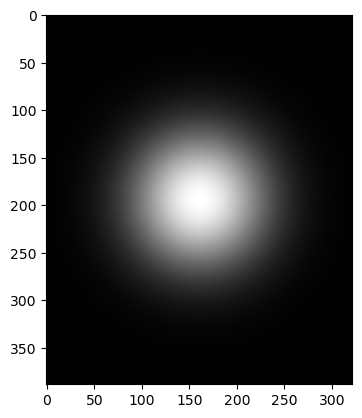

In [37]:
# plot the third image in the bottom-left subplot
D=50
plt.imshow(np.abs(gaussianLP(D,fshift.shape)), cmap='gray')

In [ ]:
###YOUR CODE ###
#Change the distance from center 'D' from 10 - 60 and display the filter and see how the filter changed

###YOUR CODE ###

#### Step 5: Inverse FFT Shift

After filtering the image in the frequency domain, we need to move it back to its original location before applying the inverse FFT. To achieve this, we use the inverse FFT shift, which reverses the shifting process performed earlier.

In [38]:
inverse_fft = np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))

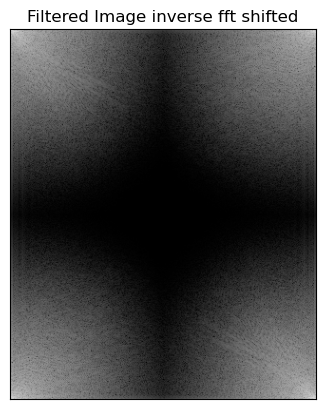

In [267]:
fig, ax = plt.subplots()
im = ax.imshow(np.log(1+np.abs(inverse_fft)), cmap='gray')
ax.set_title('Filtered Image inverse fft shifted')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('filtered image inverse fft shifted.png', bbox_inches='tight')

#### Step6 :  Inverse Fast Fourier Transform (IFFT)

IFFT is the final step in the frequency transformation of images. It is used to transfer the image from the frequency domain back to the spatial domain. This step results in an image that has reduced noise and improved clarity compared to the original image in the spatial domain.

In [268]:
###YORUR CODE## 
#Inverse FFS to spatial domain 
filtered_img = np.fft.ifft2(inverse_fft)
###YORUR CODE##

/var/folders/_r/h4p_j1bj32x5n57v17k948w80000gn/T/ipykernel_37426/1545183595.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(filtered_img.astype(int), cmap='gray')


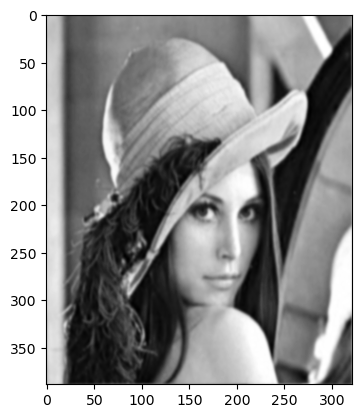

In [300]:
plt.imshow(filtered_img.astype(int), cmap='gray')

/var/folders/_r/h4p_j1bj32x5n57v17k948w80000gn/T/ipykernel_37426/34335967.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(np.fft.ifft2(np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))).astype(int), cmap='gray')


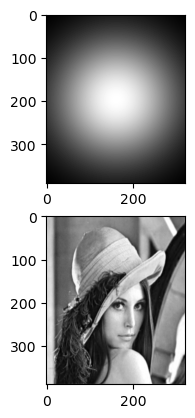

In [296]:
#Now you can change D to different values, and see how the image changed
D = 100
fig, ax = plt.subplots(2, 1) # create a 2x1 grid of subplots
ax[0].imshow(gaussianLP(D,fshift.shape), cmap='gray')
ax[1].imshow(np.fft.ifft2(np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))).astype(int), cmap='gray')

/var/folders/_r/h4p_j1bj32x5n57v17k948w80000gn/T/ipykernel_37426/3202677329.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(np.fft.ifft2(np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))).astype(int), cmap='gray')


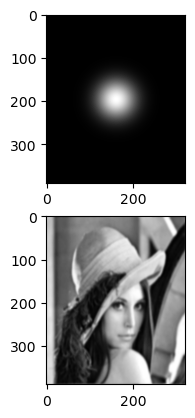

In [297]:
D = 30
fig, ax = plt.subplots(2, 1) # create a 2x2 grid of subplots
ax[0].imshow(gaussianLP(D,fshift.shape), cmap='gray')
ax[1].imshow(np.fft.ifft2(np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))).astype(int), cmap='gray')

/var/folders/_r/h4p_j1bj32x5n57v17k948w80000gn/T/ipykernel_37426/2061105507.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(np.fft.ifft2(np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))).astype(int), cmap='gray')


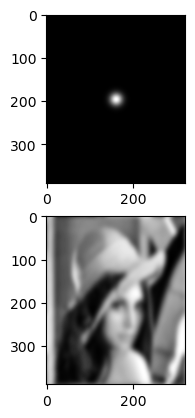

In [298]:
D = 10
fig, ax = plt.subplots(2, 1) # create a 2x2 grid of subplots
ax[0].imshow(gaussianLP(D,fshift.shape), cmap='gray')
ax[1].imshow(np.fft.ifft2(np.fft.ifftshift(fshift * gaussianLP(D,fshift.shape))).astype(int), cmap='gray')

You can see with the decrease of the distance D,  more frequencies are suppressed, resulting in a smoother image with less detail.

In [ ]:
# You can also change the low pass filter (gaussianLP)to high pass filter (gaussianHP) and to see the results

In summary, modifying image frequency using FFT is an efficacious approach to reduce noise and enhance image sharpness. This involves transforming the image to the frequency domain using FFT, filtering the noise using appropriate techniques, and converting the modified image back to the spatial domain using inverse FFT. By understanding and implementing these techniques, we can improve the quality of images for various applications.

In [ ]:
### References: https://www.kaggle.com/code/muhammadahmed26/image-processing-with-python